# Exámen Diplomatura Ciencia de Datos 3º Bimestre

Este tercer notebook contiene el código usando el df_final usado para el preprocesamiento y modelado de los datos, y entrega un CSV con la predicción del mes 04.

## Datos del Grupo (Ingrese los datos de los miembros del grupo)

Nombre y Apellido | LU
------------------|---
CROMBERG JAVIER EUGENIO | 1153099
CRUZ PINEDA FABIAN | 1099002
GARCIA CAROLINA | 1157796
GIULIANO AUGUSTO | 1157378
INZA ROBERTO | 1151488
URRACO EZEQUIEL| 1159531

---



# 3. Preparación de los Datos para su uso


## 3.1 Librerias

In [1]:
!pip3 install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.6 MB/s 


In [2]:
from datetime import datetime
inicial_date = datetime.now()

# Librerias básicas
import pandas as pd
import numpy as np
from scipy.stats import iqr
from collections import Counter

# Libreria de visiaulización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns
from matplotlib.colors import ListedColormap

# Asociadas con la creacion del modelo
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold,GridSearchCV
from sklearn.metrics import precision_recall_curve, accuracy_score,roc_auc_score, auc, roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report,precision_score,recall_score,RocCurveDisplay, log_loss #get_scorer_names
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, SelectPercentile, RFE, chi2, f_classif, f_regression
import category_encoders as ce

# Modelos / Algoritmos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier,VotingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Librerías para Análisis Estadístico
from scipy import stats
import statsmodels.stats as sm
import statsmodels.api as sma
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import fisher_exact, chi2_contingency


In [3]:
# Para ingresar a traves de colab

from google.colab import drive
drive.mount('/content/drive')

url = "/content/drive/My Drive/DataScience/Banco/banco_to_model.csv"
df_final = pd.read_csv(url, low_memory = False, index_col = 0)

Mounted at /content/drive


In [4]:
#df_final = pd.read_csv('banco_to_model.csv', index_col = 0)#, low_memory = False)

In [5]:
df_final.shape

(549859, 88)

In [6]:
df_final.head()

,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,mcaja_ahorro_dolares,mcuentas_saldo,mautoservicio,mplan_sueldo,mextraccion_autoservicio,...,tcuenta,trenta,tseguro,tdebitos_automaticos,tdescuento,ttransacciones,tcajas_total,tcajero_transaccion,ttarjeta_visa_master,target_bin
0,0.00,9669.42,0.00,0.00,0.00,0.0,1214.93,0.0,0.0,0.0,...,1,0,0,1,1,0,1,0,1,0
1,229.62,9681.11,761.61,-519.61,64.92,0.0,965.42,0.0,0.0,0.0,...,1,0,0,1,0,1,1,0,1,0
2,-83.11,8931.04,395.03,-482.88,74.20,0.0,800.80,0.0,0.0,0.0,...,1,0,0,1,1,1,1,0,1,0
3,0.00,4107.16,0.00,0.00,0.00,0.0,1061.04,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0
4,316.04,4515.55,231.05,52.40,20.24,0.0,30.33,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0


# 4. Definimos los datos de la matriz X y del vector y
## a. Creamos X e y

In [7]:
X = df_final.drop(["target_bin"], axis = 1)

y = df_final["target_bin"]

In [8]:
X.head()

,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,mcaja_ahorro_dolares,mcuentas_saldo,mautoservicio,mplan_sueldo,mextraccion_autoservicio,...,tpaquete,tcuenta,trenta,tseguro,tdebitos_automaticos,tdescuento,ttransacciones,tcajas_total,tcajero_transaccion,ttarjeta_visa_master
0,0.00,9669.42,0.00,0.00,0.00,0.0,1214.93,0.0,0.0,0.0,...,0,1,0,0,1,1,0,1,0,1
1,229.62,9681.11,761.61,-519.61,64.92,0.0,965.42,0.0,0.0,0.0,...,0,1,0,0,1,0,1,1,0,1
2,-83.11,8931.04,395.03,-482.88,74.20,0.0,800.80,0.0,0.0,0.0,...,0,1,0,0,1,1,1,1,0,1
3,0.00,4107.16,0.00,0.00,0.00,0.0,1061.04,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,1
4,316.04,4515.55,231.05,52.40,20.24,0.0,30.33,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,1


In [9]:
y.head

<bound method NDFrame.head of 0         0
1         0
2         0
3         0
4         0
         ..
549854    0
549855    0
549856    0
549857    0
549858    0
Name: target_bin, Length: 549859, dtype: int64>

### b. Evaluamos la Variable Target 

In [10]:
from collections import Counter

In [11]:
print(sorted(Counter(y).items()))

[(0, 549086), (1, 773)]


([<matplotlib.axis.XTick at 0x7f89d51c3490>,
 <a list of 2 Text major ticklabel objects>)

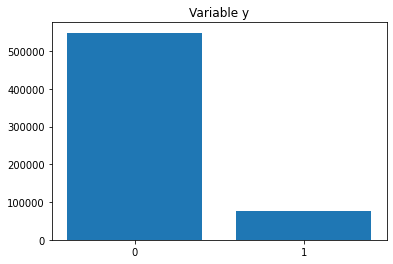

In [12]:
# Graficamos el vector y 
counting = sorted(Counter(y).items())
plt.bar ((counting[0][0], counting[1][0]), (counting[0][1], counting[1][1]*100))
plt.title('Variable y')
plt.xticks([0, 1])

# 5. Model Data

## Funciones útiles para el modelaje

In [13]:
def conf_matrix(Y_train, Y_train_pred, Y_test, Y_test_pred):
    # Train Confusion Matrix 
    cf_matrix_train = confusion_matrix(Y_train, Y_train_pred)
    group_names_train = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts_train = ["{0:0.0f}".format(value) for value in cf_matrix_train.flatten()]
    labels_train = [f"{v1}\n{v2}" for v1, v2 in zip(group_names_train, group_counts_train)]
    labels_train = np.asarray(labels_train).reshape(2,2)
    
    # Test Confusion Matrix     
    cf_matrix_test = confusion_matrix(Y_test, Y_test_pred)
    group_names_test = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts_test = ["{0:0.0f}".format(value) for value in cf_matrix_test.flatten()]
    labels_test = [f"{v1}\n{v2}" for v1, v2 in zip(group_names_test, group_counts_test)]
    labels_test = np.asarray(labels_test).reshape(2,2)
    
    # Graphics
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
    sns.heatmap(cf_matrix_train, annot = labels_train, annot_kws = {'size': 14}, fmt = "", cmap = ListedColormap(["white"]), cbar = False, linewidths = 4, linecolor = 'black', ax = ax[0])
    sns.heatmap(cf_matrix_test, annot = labels_test, annot_kws = {'size': 14}, fmt = "", cmap = ListedColormap(["white"]), cbar = False, linewidths = 4, linecolor = 'black', ax = ax[1])
    
    # Titles, labels, ticks, etc
    ax[0].set_title("Train Confusion Matrix", fontsize = 20)
    ax[1].set_title("Test Confusion Matrix", fontsize = 20)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.show()
    
    print("---" * 34)

In [14]:
def roc_curve_graph(y_test, y_test_pred_proba):
    fpr, tpr, thr = roc_curve(y_test, y_test_pred_proba) 

    plt.figure(figsize = (8,8))

    plt.plot(fpr, tpr, color = "black")
    plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01), color = "darkgreen", linestyle = "--")

    plt.title("Test ROC Curve", fontsize = 18) 
    plt.xlabel("1 - Specificty", fontsize = 16)
    plt.ylabel("Sensitivity", fontsize = 16)

    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.yticks(ticks = [0,0.2,0.4,0.6,0.8,1], labels = ["",0.2,0.4,0.6,0.8,1], fontsize = 14)
    plt.xticks(fontsize = 14)

    style = dict(size = 14, color = "black", fontstyle = "oblique")
    props = dict(boxstyle = "round", facecolor = "grey", alpha=0.5)

    auc_score = round(auc(fpr, tpr), 2)

    plt.text(0.85, 0.1, f"AUC = {auc_score}", ha = "center", va = "bottom", **style, bbox = props)

    plt.show()
    
    print("---" * 34)

In [15]:
def metrics(Y_train, Y_test, Y_train_pred, Y_test_pred, Y_train_pred_proba, Y_test_pred_proba):
    print(f"\tTrain Precision Score:{precision_score(Y_train, Y_train_pred):.3f}")
    print(f"\tTest Precision Score:{precision_score(Y_test, Y_test_pred):.3f}")
    print("\t---" * 4)
    print(f"\tTrain Recall Score:{recall_score(Y_train, Y_train_pred):.3f}")
    print(f"\tTest Recall Score:{recall_score(Y_test, Y_test_pred):.3f}")
    print("\t---" * 4)
    print(f"\tTrain ROC AUC Score:{roc_auc_score(Y_train, Y_train_pred_proba):.3f}")
    print(f"\tTest ROC AUC Score:{roc_auc_score(Y_test, Y_test_pred_proba):.3f}")
    print("---" * 34)

In [16]:
def fit_train(model):
    print("For", str(model).split("(")[0],":")
    global fit
    fit = model.fit(X_train_t, y_train_t.values.reshape(-1,))
    
    y_train_pred = model.predict(X_train_t)> 0.02
    y_test_pred = model.predict(X_val)> 0.02
    
    y_train_pred_proba = model.predict_proba(X_train_t)[:, 1]
    y_test_pred_proba = model.predict_proba(X_val)[:, 1]

    metrics(y_train_t, y_val, y_train_pred, y_test_pred, y_train_pred_proba, y_test_pred_proba)
    
    conf_matrix(y_train_t, y_train_pred, y_val, y_test_pred)
    roc_curve_graph(y_val, y_test_pred_proba)
    print(classification_report(y_val, y_test_pred))

In [17]:
def fit_final(model):
    print("For", str(model).split("(")[0],":")
    global fit
    fit = model.fit(X_train_std_sel, y_train.values.reshape(-1,))
    
    y_train_pred = model.predict(X_train_std_sel)
    y_test_pred = model.predict(X_test_std_sel)
    
    y_train_pred_proba = model.predict_proba(X_train_std_sel)[:, 1]
    y_test_pred_proba = model.predict_proba(X_test_std_sel)[:, 1]

    metrics(y_train, y_test, y_train_pred, y_test_pred, y_train_pred_proba, y_test_pred_proba)
    
    conf_matrix(y_train, y_train_pred, y_test, y_test_pred)
    roc_curve_graph(y_test, y_test_pred_proba)
    print(classification_report(y_test, y_test_pred))

## 5.1. División Train / Test

In [18]:
# Hacemos la división sobre TODO el dataset que incluye el Id_Cliente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)

# Para el Train / Test real NO tomamos en cuenta el Id_cliente (columna [0])
X_train_data = X_train.drop(["numero_de_cliente"], axis = 1)
X_test_data = X_test.drop(["numero_de_cliente"], axis = 1)


In [19]:
print("Data1 Shape: {}".format(X.shape))
print("Train1 Shape: {}".format(X_train_data.shape))
print("Test1 Shape: {}".format(X_test_data.shape))

Data1 Shape: (549859, 87)
Train1 Shape: (439887, 86)
Test1 Shape: (109972, 86)


# <center> Training </center>
## 5.2. Extracción de Características
En este caso los métodos de extracción de variables a partir de textos o imágenes no son necesarias de implementar

## 5.3. Escalado de variables

In [20]:
# Escalamos la variable X_train con Standar Scaler de sklearn
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train_data)

In [21]:
X_train_std = pd.DataFrame(X_train_std, columns = X_train_data.columns)

In [22]:
X_train_std.columns

Index(['mrentabilidad', 'mrentabilidad_annual', 'mcomisiones',
       'mactivos_margen', 'mpasivos_margen', 'mcaja_ahorro_dolares',
       'mcuentas_saldo', 'mautoservicio', 'mplan_sueldo',
       'mextraccion_autoservicio', 'Master_mfinanciacion_limite',
       'Master_msaldodolares', 'Master_mpagado', 'Visa_mfinanciacion_limite',
       'Visa_msaldototal', 'Visa_msaldodolares', 'Visa_madelantopesos',
       'Visa_madelantodolares', 'Visa_mpagado', 'Visa_mpagosdolares',
       'Visa_mconsumototal', 'mcaja_ahorro_CC', 'mtarjeta_all_consumo',
       'mprestamos_all', 'renta_dolar', 'mdebitos_automaticos', 'mdescuentos',
       'mcomision', 'mcambio_venta_compra', 'mtransferencia_emitida_recibida',
       'mcheques_emitido_depositado', 'mcheques_emitido_depositado_r',
       'mcajero_transaccion', 'marketing_activo_ultimos90dias',
       'mdescubierto_preacordado', 'Master_marca_atraso', 'Visa_marca_atraso',
       'edad_bin_>80', 'antiq_bin_<20', 'antiq_bin_nan',
       'cliente_sucursa

## 5.4. Selección de Variables (features  selection)

In [23]:
# Visualizamos la forma de X_train estandarizado antes de aplicar la selección de variables
X_train_std.shape

(439887, 86)

La selección univariada de variables ('Univariate feature selection') funciona seleccionando las mejores características basándose en pruebas estadísticas univariadas, en este caso el `chi2`.

In [24]:
feature_sel = SelectPercentile(chi2, percentile=15)
X_train_std_sel = feature_sel.fit_transform(X_train_std, y_train)

In [25]:
# Nos quedamos con el percentil 5% de la totalidad de variables 
X_train_std_sel

array([[1., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       ...,
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.]])

In [26]:
cols = feature_sel.get_support(indices = True)

X_train_std_sel = pd.DataFrame(X_train_std_sel, columns = X_train_std.columns[cols])

X_train_std_sel.columns

Index(['marketing_activo_ultimos90dias', 'Master_marca_atraso',
       'Visa_marca_atraso', 'marketing_coss_selling_6',
       'Master_cuenta_estado_11.0', 'Master_cuenta_estado_12.0',
       'Visa_cuenta_estado_11.0', 'Visa_cuenta_estado_12.0',
       'Visa_cuenta_estado_19.0', 'Visa_tadelantosefectivo', 'tdescuento',
       'ttransacciones', 'tcajero_transaccion'],
      dtype='object')

## 5.5 Modelado 

### Entrenamiento
#### 5.5.a. Validación cruzada con subtrain / val

#### 5.5.b. Optimización de hiperparámetros
Se entrena con un modelo de $subtrain$ y se evalúan los resultados extrayendo diferentes métricas sobre $val$, lo que lleva a buscar los `Hiperparámetros óptimos`

#### 5.5.c. Modelo Definitivo
Se entrena el modelo definitivo con X_train (subtrain + val), y_train con mdeol.fit() 

Esta etapa se realizará con cada modelo usando el X_train para hacer cross_val_score y GridSearchCV para finalmente comparar resultados y decidir acerca del mejor modelo

`5.5.a. Validación cruzada con subtrain / val`, `5.5.b. Optimización de hiperparámetros` y ` 5.5.c. Modelo Definitivo` se incluyen a continuación en cada a testear 

## Buscando el mejor Modelo

### Definimos los grupos subtrain y val a partir de X_train e y_train

In [27]:
# Hacemos la división sobre X_trai e y_train el dataset que incluye el Id_Cliente
X_train_t, X_val, y_train_t, y_val = train_test_split(X_train_std_sel, y_train, test_size=0.2, stratify = y_train, random_state = 42)


Se intentó hacer una transformación de los valores positivos de y pero si bien dicha transformación generó un aumento significativo de los TP se incrementó desproporcionadamente los FP con lo cual el modelo da pérdida. Se adjunta el `df_final_smote.csv` que contiene la matriz de datos para eventualmente evaluar los modelos con la variable y transformada. 

In [28]:
print("X_train_t Shape: {}".format(X_train_t.shape))
print("X_val Shape: {}".format(X_val.shape))
print("y_train_t Shape: {}".format(y_train_t.shape))
print("y_val Shape: {}".format(y_val.shape))

X_train_t Shape: (351909, 13)
X_val Shape: (87978, 13)
y_train_t Shape: (351909,)
y_val Shape: (87978,)


([<matplotlib.axis.XTick at 0x7f89bcca1b90>,
 <a list of 2 Text major ticklabel objects>)

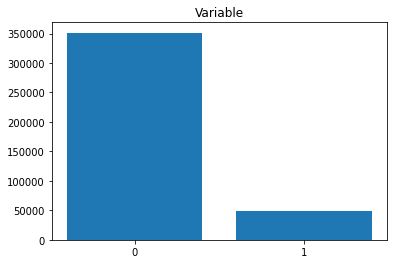

In [29]:
# Graficamos el vector y 
counting = sorted(Counter(y_train_t).items())
plt.bar ((counting[0][0], counting[1][0]), (counting[0][1], counting[1][1]*100))
plt.title('Variable')
plt.xticks([0, 1])

## 1. Regresión Logística

In [30]:
lreg = LogisticRegression(max_iter = 3000, class_weight = {0: 0.5, 1: 0.5})

In [31]:
lreg.fit(X_train_t, y_train_t)

LogisticRegression(class_weight={0: 0.5, 1: 0.5}, max_iter=3000)

In [32]:
y_train_pred = lreg.predict(X_train_t)

In [33]:
y_train_pred_proba = lreg.predict_proba(X_train_t)

In [34]:
y_test_pred = lreg.predict(X_val)

In [35]:
y_test_pred_proba = lreg.predict_proba(X_val)

In [36]:
# Cross Val Score
cvs_train = cross_val_score(lreg, X_train_t, y_train_t, cv=5, scoring = 'recall')

In [37]:
print(f'El promedio de recall es: {cvs_train.mean()}')
cvs_train

El promedio de recall es: 0.008101422387136672


array([0.        , 0.        , 0.        , 0.03030303, 0.01020408])

In [38]:
import sklearn.metrics

For LogisticRegression :
	Train Precision Score:0.389
	Test Precision Score:0.000
	---	---	---	---
	Train Recall Score:0.014
	Test Recall Score:0.000
	---	---	---	---
	Train ROC AUC Score:0.946
	Test ROC AUC Score:0.951
------------------------------------------------------------------------------------------------------


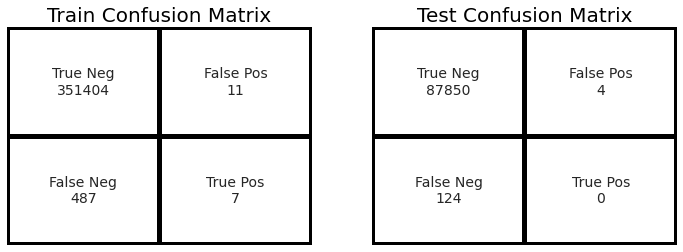

------------------------------------------------------------------------------------------------------


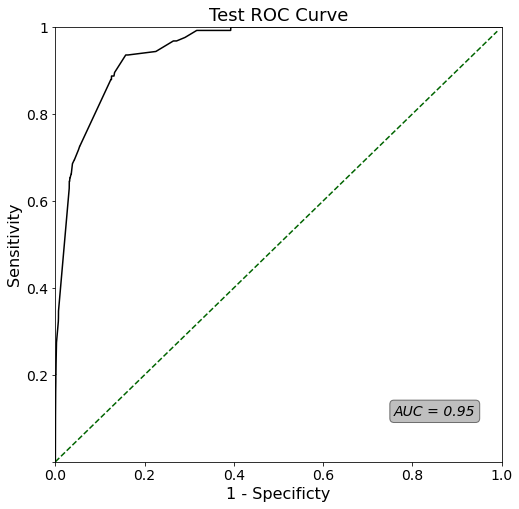

------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87854
           1       0.00      0.00      0.00       124

    accuracy                           1.00     87978
   macro avg       0.50      0.50      0.50     87978
weighted avg       1.00      1.00      1.00     87978



In [39]:
fit_train(lreg)

### Regresión Logística: Definiendo las predicción según el límite calculado por la matriz de costos 

In [40]:
threshold = 0.02

In [41]:
y_train_pred_h = y_train_pred_proba[:, 1] > threshold
y_test_pred_h = y_test_pred_proba[:, 1] > threshold

In [42]:
y_train_pred_h.shape

(351909,)

In [43]:
y_test_pred_h.sum()

636

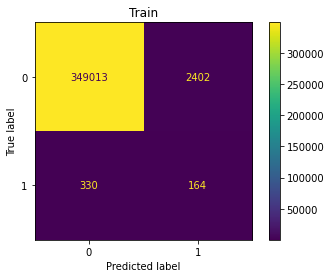

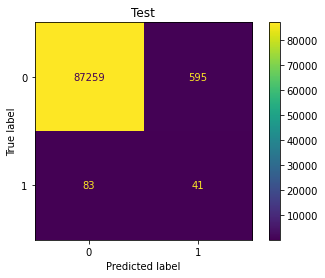

In [44]:
# HeatMap de Matriz de Confusión

cm_train = confusion_matrix(y_train_t, y_train_pred_h, labels=lreg.classes_)
cm_test = confusion_matrix(y_val, y_test_pred_h, labels=lreg.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                               display_labels=lreg.classes_)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                               display_labels=lreg.classes_)

disp_train.plot()
disp_train.ax_.set_title('Train')

disp_test.plot()
disp_test.ax_.set_title('Test')


plt.show()

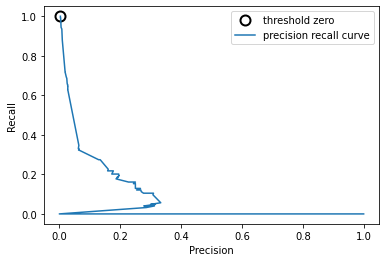

In [45]:
precision, recall, thresholds = precision_recall_curve(y_val, lreg.predict_proba(X_val)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [46]:
# Tabla de métricas de Clasificación
target_names = ['class 0', 'class 1']
clf_report = classification_report(y_val, y_test_pred_h, target_names=target_names)
print(clf_report)

              precision    recall  f1-score   support

     class 0       1.00      0.99      1.00     87854
     class 1       0.06      0.33      0.11       124

    accuracy                           0.99     87978
   macro avg       0.53      0.66      0.55     87978
weighted avg       1.00      0.99      0.99     87978



## 2. Árboles de Decisión 

In [47]:
dtree = DecisionTreeClassifier(random_state = 42)

In [48]:
dtree.fit(X_train_t, y_train_t)

DecisionTreeClassifier(random_state=42)

In [49]:
y_train_pred = dtree.predict(X_train_t)

In [50]:
y_train_pred_proba = dtree.predict_proba(X_train_t)

In [51]:
y_test_pred = dtree.predict(X_val)

In [52]:
y_test_pred_proba = dtree.predict_proba(X_val)

For DecisionTreeClassifier :
	Train Precision Score:0.929
	Test Precision Score:0.000
	---	---	---	---
	Train Recall Score:0.026
	Test Recall Score:0.000
	---	---	---	---
	Train ROC AUC Score:0.951
	Test ROC AUC Score:0.911
------------------------------------------------------------------------------------------------------


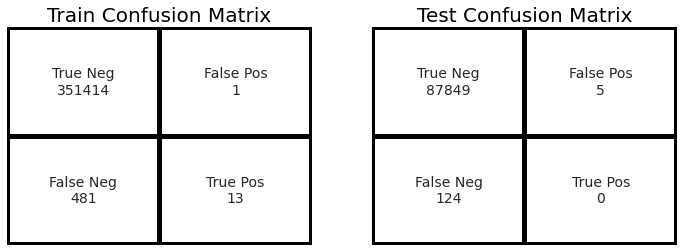

------------------------------------------------------------------------------------------------------


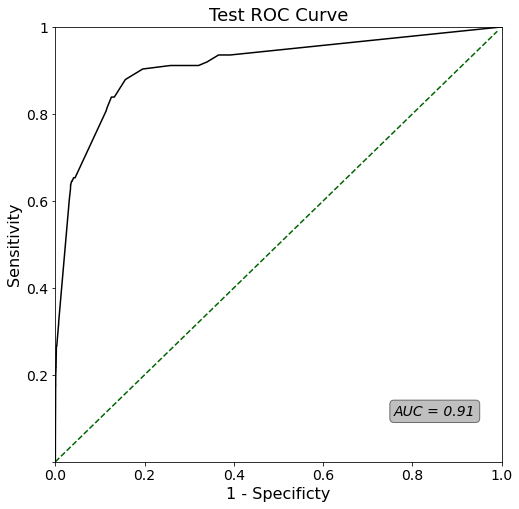

------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87854
           1       0.00      0.00      0.00       124

    accuracy                           1.00     87978
   macro avg       0.50      0.50      0.50     87978
weighted avg       1.00      1.00      1.00     87978



In [53]:
fit_train(dtree)

### Aplicando Cross_Val_Score y GridSearchCV a Decision Tree

In [54]:
# Cross Val Score
cvs_train = cross_val_score(dtree, X_train_t, y_train_t, cv=5, scoring = 'recall')

In [55]:
print(f'El pormedio de recall es: {cvs_train.mean()}')
cvs_train

El pormedio de recall es: 0.008101422387136672


array([0.01010101, 0.        , 0.01010101, 0.01010101, 0.01020408])

In [56]:
# Gris Search CV
param_grid = { 
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,8,12,16, 20, 24, 28, 32],
    'criterion' :['gini', 'entropy']
}

In [57]:
CV_dtree = GridSearchCV(estimator=dtree, param_grid=param_grid, cv= 5, scoring = 'recall')
CV_dtree.fit(X_train_t, y_train_t)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12, 16, 20, 24, 28, 32],
                         'max_features': ['sqrt', 'log2']},
             scoring='recall')

In [58]:
CV_dtree.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}

In [59]:
# Implementamos el rf final con los mejores parámetros de GridSearchCV
dtree_final = DecisionTreeClassifier(criterion= 'gini', max_depth= 32,max_features= 'sqrt', random_state = 42)

In [60]:
dtree_final.fit(X_train_t, y_train_t)

DecisionTreeClassifier(max_depth=32, max_features='sqrt', random_state=42)

In [61]:
y_train_pred = dtree_final.predict(X_train_t)

In [62]:
y_train_pred_proba = dtree_final.predict_proba(X_train_t)

In [63]:
y_test_pred = dtree_final.predict(X_val)

In [64]:
y_test_pred_proba = dtree_final.predict_proba(X_val)

For DecisionTreeClassifier :
	Train Precision Score:0.929
	Test Precision Score:0.083
	---	---	---	---
	Train Recall Score:0.026
	Test Recall Score:0.008
	---	---	---	---
	Train ROC AUC Score:0.951
	Test ROC AUC Score:0.911
------------------------------------------------------------------------------------------------------


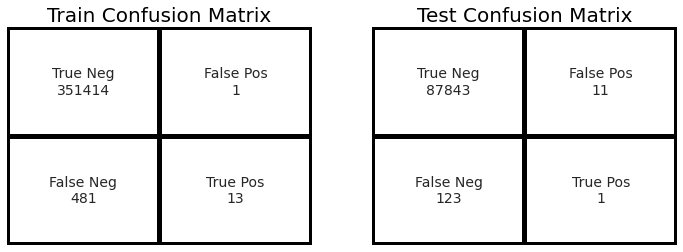

------------------------------------------------------------------------------------------------------


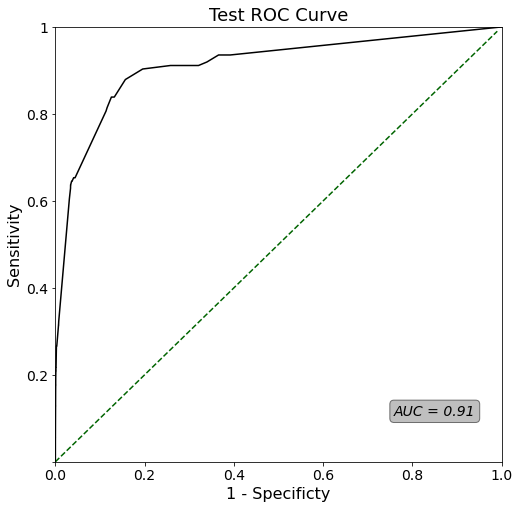

------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87854
           1       0.08      0.01      0.01       124

    accuracy                           1.00     87978
   macro avg       0.54      0.50      0.51     87978
weighted avg       1.00      1.00      1.00     87978



In [65]:
# Utilizamos las función de resumen de métricas de predicción
fit_train(dtree_final)

### Árbol de Decisión: Definiendo las predicción según el límite calculado por la matriz de costos 

In [66]:
threshold = 0.02

In [67]:
y_train_pred_h = y_train_pred_proba[:, 1] > threshold
y_test_pred_h = y_test_pred_proba[:, 1] > threshold

In [68]:
y_train_pred_h.shape

(351909,)

In [69]:
y_test_pred_h.sum()

707

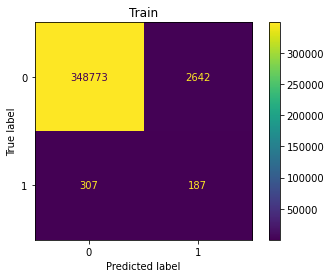

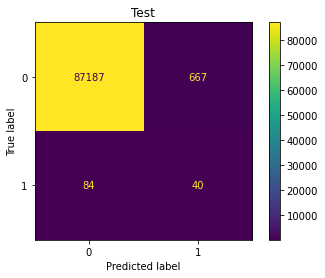

In [70]:
# HeatMap de Matriz de Confusión

cm_train = confusion_matrix(y_train_t, y_train_pred_h, labels=dtree_final.classes_)
cm_test = confusion_matrix(y_val, y_test_pred_h, labels=dtree_final.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                               display_labels=dtree_final.classes_)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                               display_labels=dtree_final.classes_)

disp_train.plot()
disp_train.ax_.set_title('Train')

disp_test.plot()
disp_test.ax_.set_title('Test')


plt.show()

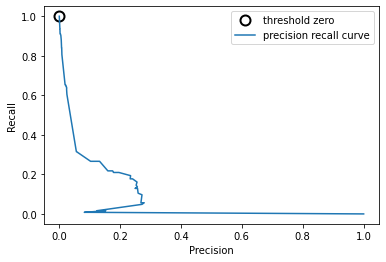

In [71]:
precision, recall, thresholds = precision_recall_curve(y_val, dtree_final.predict_proba(X_val)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [72]:
# Tabla de métricas de Clasificación
target_names = ['class 0', 'class 1']
clf_report = classification_report(y_val, y_test_pred_h, target_names=target_names)
print(clf_report)

              precision    recall  f1-score   support

     class 0       1.00      0.99      1.00     87854
     class 1       0.06      0.32      0.10       124

    accuracy                           0.99     87978
   macro avg       0.53      0.66      0.55     87978
weighted avg       1.00      0.99      0.99     87978



## 3. Random Forest

In [73]:
rf = RandomForestClassifier()

In [74]:
rf.fit(X_train_t, y_train_t)

RandomForestClassifier()

In [75]:
y_train_pred = rf.predict(X_train_t)

In [76]:
y_train_pred_proba = rf.predict_proba(X_train_t)

In [77]:
y_test_pred = rf.predict(X_val)

In [78]:
y_test_pred_proba = rf.predict_proba(X_val)

For RandomForestClassifier :
	Train Precision Score:0.929
	Test Precision Score:0.000
	---	---	---	---
	Train Recall Score:0.026
	Test Recall Score:0.000
	---	---	---	---
	Train ROC AUC Score:0.950
	Test ROC AUC Score:0.926
------------------------------------------------------------------------------------------------------


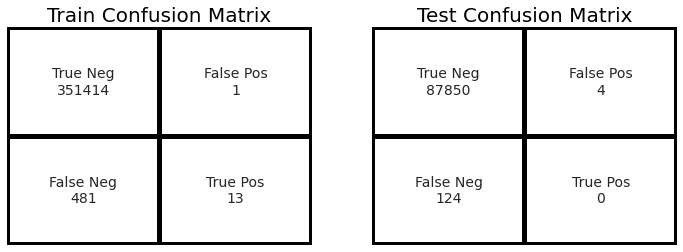

------------------------------------------------------------------------------------------------------


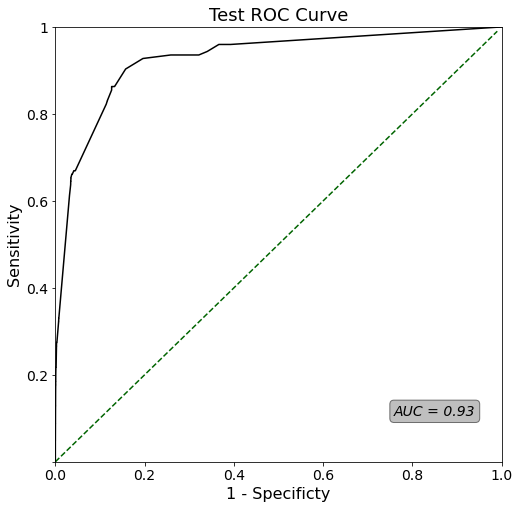

------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87854
           1       0.00      0.00      0.00       124

    accuracy                           1.00     87978
   macro avg       0.50      0.50      0.50     87978
weighted avg       1.00      1.00      1.00     87978



In [79]:
# Utilizamos las función de resumen de métricas de predicción
fit_train(rf)

### Aplicando Cross_Val_Score y GridSearchCV a Random Forest

In [80]:
# Cross Val Score
cvs_train = cross_val_score(rf, X_train_t, y_train_t, cv=5, scoring = 'recall') #, random_state = 42)

In [81]:
print(f'El pormedio de recall es: {cvs_train.mean()}')
cvs_train

El pormedio de recall es: 0.010121624407338693


array([0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01020408])

In [82]:
# Gris Search CV
param_grid = { 
    'n_estimators': [5, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,8,12,16, 20, 24, 28, 32],
    'criterion' :['gini', 'entropy']
}

In [83]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, scoring = 'recall') #, random_state = 42)
CV_rfc.fit(X_train_t, y_train_t)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12, 16, 20, 24, 28, 32],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [5, 10, 20]},
             scoring='recall')

In [84]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 24,
 'max_features': 'sqrt',
 'n_estimators': 10}

In [85]:
# Implementamos el rf final con los mejores parámetros de GridSearchCV
rf_final = RandomForestClassifier(criterion= 'gini', max_depth= 14,max_features= 'sqrt',n_estimators= 5)

In [86]:
rf_final.fit(X_train_t, y_train_t)

RandomForestClassifier(max_depth=14, max_features='sqrt', n_estimators=5)

In [87]:
y_train_pred = rf_final.predict(X_train_t)

In [88]:
y_train_pred_proba = rf_final.predict_proba(X_train_t)

In [89]:
y_test_pred = rf_final.predict(X_val)

In [90]:
y_test_pred_proba = rf_final.predict_proba(X_val)

For RandomForestClassifier :
	Train Precision Score:0.727
	Test Precision Score:0.200
	---	---	---	---
	Train Recall Score:0.032
	Test Recall Score:0.008
	---	---	---	---
	Train ROC AUC Score:0.951
	Test ROC AUC Score:0.916
------------------------------------------------------------------------------------------------------


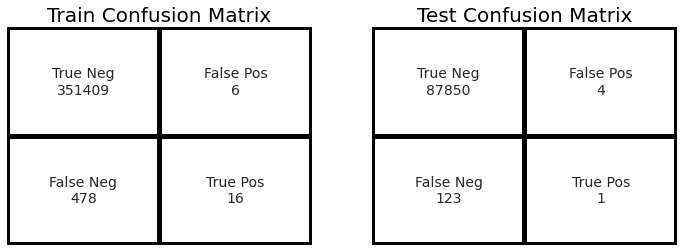

------------------------------------------------------------------------------------------------------


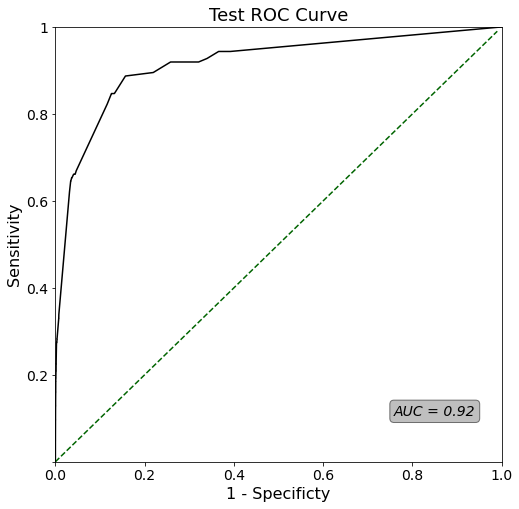

------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87854
           1       0.20      0.01      0.02       124

    accuracy                           1.00     87978
   macro avg       0.60      0.50      0.51     87978
weighted avg       1.00      1.00      1.00     87978



In [91]:
# Utilizamos las función de resumen de métricas de predicción
fit_train(rf_final)

### Random Forest: Definiendo las predicción según el límite calculado por la matriz de costos 

In [92]:
threshold = 0.02

In [93]:
y_train_pred_h = y_train_pred_proba[:, 1] > threshold
y_test_pred_h = y_test_pred_proba[:, 1] > threshold

In [94]:
y_train_pred_h.shape

(351909,)

In [95]:
y_test_pred_h.sum()

709

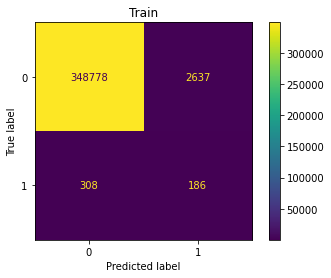

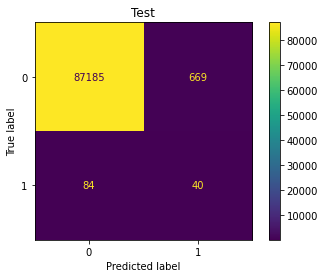

In [96]:
# HeatMap de Matriz de Confusión

cm_train = confusion_matrix(y_train_t, y_train_pred_h, labels=rf_final.classes_)
cm_test = confusion_matrix(y_val, y_test_pred_h, labels=rf_final.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                               display_labels=rf_final.classes_)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                               display_labels=rf_final.classes_)

disp_train.plot()
disp_train.ax_.set_title('Train')

disp_test.plot()
disp_test.ax_.set_title('Test')


plt.show()

In [97]:
final_date = datetime.now()
print((final_date-inicial_date)/60)

0:00:10.298526


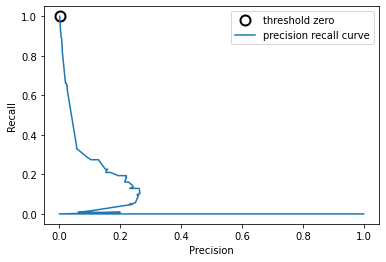

In [98]:
precision, recall, thresholds = precision_recall_curve(y_val, rf_final.predict_proba(X_val)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [99]:
# Tabla de métricas de Clasificación
target_names = ['class 0', 'class 1']
clf_report = classification_report(y_val, y_test_pred_h, target_names=target_names)
print(clf_report)

              precision    recall  f1-score   support

     class 0       1.00      0.99      1.00     87854
     class 1       0.06      0.32      0.10       124

    accuracy                           0.99     87978
   macro avg       0.53      0.66      0.55     87978
weighted avg       1.00      0.99      0.99     87978



## 4. SVC

In [ ]:
svc = SVC(probability = True)

In [ ]:
svc.fit(X_train_t, y_train_t)

In [ ]:
y_train_pred = svc.predict(X_train_t)

In [ ]:
y_train_pred_proba = svc.predict_proba(X_train_t)

In [ ]:
y_test_pred = svc.predict(X_val)

In [ ]:
y_test_pred_proba = svc.predict_proba(X_val)

In [ ]:
# Utilizamos las función de resumen de métricas de predicción
fit_train(svc)

### Aplicando Cross_Val_Score y GridSearchCV a SVC

In [ ]:
# Cross Val Score
cvs_train = cross_val_score(svc, X_train_t, y_train_t, cv=5, scoring = 'recall')#, random_state = 42)

In [ ]:
print(f'El promedio de recall es: {cvs_auc_train.mean()}')
cvs_train

In [ ]:
# Grid Search CV
param_grid = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001], 
              'kernel':['linear','rbf']}

In [ ]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5, scoring = 'recall', random_state = 42)
CV_svc.fit(X_train_t, y_train_t)

In [ ]:
CV_svc.best_params_

In [ ]:
# Implementamos el rf final con los mejores parámetros de GridSearchCV
svc_final = SVC(C = 10, gamma = 0.1, kernel = 'linear', probability = True)

In [ ]:
svc_final.fit(X_train_t, y_train_t)

In [ ]:
y_train_pred = svc_final.predict(X_train_t)

In [ ]:
y_train_pred_proba = svc_final.predict_proba(X_train_t)

In [ ]:
y_test_pred = svc_final.predict(X_val)

In [ ]:
y_test_pred_proba = svc_final.predict_proba(X_val)

In [ ]:
# Utilizamos las función de resumen de métricas de predicción
fit_train(svc_final)

### SVC: Definiendo las predicción según el límite calculado por la matriz de costos 

In [ ]:
threshold = 0.02

In [ ]:
y_train_pred_h = y_train_pred_proba[:, 1] > threshold
y_test_pred_h = y_test_pred_proba[:, 1] > threshold

In [ ]:
y_train_pred_h.shape

In [ ]:
y_test_pred_h.sum()

In [ ]:
# HeatMap de Matriz de Confusión

cm_train = confusion_matrix(y_train_t, y_train_pred_h, labels=svc_final.classes_)
cm_test = confusion_matrix(y_val, y_test_pred_h, labels=svc_final.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                               display_labels=svc_final.classes_)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                               display_labels=svc_final.classes_)

disp_train.plot()
disp_train.ax_.set_title('Train')

disp_test.plot()
disp_test.ax_.set_title('Test')


plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_val, svc_final.decision_function(X_val))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [ ]:
# Tabla de métricas de Clasificación
target_names = ['class 0', 'class 1']
clf_report = classification_report(y_val, y_test_pred_h, target_names=target_names)
print(clf_report)

## 5. Naive Bayes - Bernoulli

In [ ]:
nbb = BernoulliNB()

In [ ]:
nbb.fit(X_train_t, y_train_t)

In [ ]:
y_train_pred = nbb.predict(X_train_t)

In [ ]:
y_train_pred_proba = nbb.predict_proba(X_train_t)

In [ ]:
y_test_pred = nbb.predict(X_val)

In [ ]:
y_test_pred_proba = nbb.predict_proba(X_val)

In [ ]:
# Utilizamos las función de resumen de métricas de predicción
fit_train(nbb)

### Aplicando Cross_Val_Score y GridSearchCV a Naive Bayes

In [ ]:
# Cross Val Score
cvs_train = cross_val_score(nbb, X_train_t, y_train_t, cv=5, scoring = 'recall', random_state = 42)

In [ ]:
print(f'El promedio de recall es: {cvs_train.mean()}')
cvs_train

In [ ]:
# Grid Search CV
param_grid = {'alpha':[0, 0.01, 0.1, 0.5, 0.8, 1]}

In [ ]:
CV_nbb = GridSearchCV(estimator=nbb, param_grid=param_grid, cv= 5, scoring = 'recall', random_state = 42)
CV_nbb.fit(X_train_t, y_train_t)

In [ ]:
CV_nbb.best_params_

In [ ]:
# Implementamos el rf final con los mejores parámetros de GridSearchCV
nbb_final = BernoulliNB(alpha = 0.01)

In [ ]:
nbb_final.fit(X_train_t, y_train_t)

In [ ]:
y_train_pred = nbb_final.predict(X_train_t)

In [ ]:
y_train_pred_proba = nbb_final.predict_proba(X_train_t)

In [ ]:
y_test_pred = nbb_final.predict(X_val)

In [ ]:
y_test_pred_proba = nbb_final.predict_proba(X_val)

In [ ]:
# Utilizamos las función de resumen de métricas de predicción
fit_train(nbb_final)

### Naive Bayes: Definiendo las predicción según el límite calculado por la matriz de costos 

In [ ]:
threshold = 0.02

In [ ]:
y_train_pred_h = y_train_pred_proba[:, 1] > threshold
y_test_pred_h = y_test_pred_proba[:, 1] > threshold

In [ ]:
y_train_pred_h.shape

In [ ]:
y_test_pred_h.sum()

In [ ]:
# HeatMap de Matriz de Confusión

cm_train = confusion_matrix(y_train_t, y_train_pred_h, labels=nbb_final.classes_)
cm_test = confusion_matrix(y_val, y_test_pred_h, labels=nbb_final.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                               display_labels=nbb_final.classes_)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                               display_labels=nbb_final.classes_)

disp_train.plot()
disp_train.ax_.set_title('Train')

disp_test.plot()
disp_test.ax_.set_title('Test')


plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_val, nbb_final.predict_proba(X_val)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [ ]:
# Tabla de métricas de Clasificación
target_names = ['class 0', 'class 1']
clf_report = classification_report(y_val, y_test_pred_h, target_names=target_names)
print(clf_report)

## 6. KNeighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
knn.fit(X_train_t, y_train_t)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_train_pred = knn.predict(X_train_t)

In [ ]:
y_train_pred_proba = knn.predict_proba(X_train_t)

In [ ]:
y_test_pred = knn.predict(X_val)

In [ ]:
y_test_pred_proba = knn.predict_proba(X_val)

In [ ]:
# HeatMap de Matriz de Confusión

cm_train = confusion_matrix(y_train_t, y_train_pred, labels=knn.classes_)
cm_test = confusion_matrix(y_val, y_test_pred, labels=knn.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                               display_labels=knn.classes_)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                               display_labels=knn.classes_)

disp_train.plot()
disp_train.ax_.set_title('Train')

disp_test.plot()
disp_test.ax_.set_title('Test')


plt.show()

In [ ]:
print(classification_report(y_val, y_test_pred, target_names = ['Cliente Out', 'Cliente In']))

In [ ]:
# Utilizamos las función de resumen de métricas de predicción
fit_train(knn)

### Aplicando Cross_Val_Score y GridSearchCV a KNeighborClassifier

In [ ]:
# Cross Val Score
cvs_train = cross_val_score(knn, X_train_t, y_train_t, cv=5, scoring = 'recall')

In [ ]:
print(f'El pormedio de recall es: {cvs_train.mean()}')
cvs_train

In [ ]:
# Gris Search CV
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range, scoring = 'recall')


In [ ]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 5)
CV_knn.fit(X_train_t, y_train_t)

In [ ]:
CV_knn.best_params_

In [ ]:
# Implementamos el rf final con los mejores parámetros de GridSearchCV
knn_final = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
knn_final.fit(X_train_t, y_train_t)

In [ ]:
y_train_pred = knn_final.predict(X_train_t)

In [ ]:
y_train_pred_proba = knn_final.predict_proba(X_train_t)

In [ ]:
y_test_pred = knn_final.predict(X_val)

In [ ]:
y_test_pred_proba = knn_final.predict_proba(X_val)

In [ ]:
# HeatMap de Matriz de Confusión

cm_train = confusion_matrix(y_train_t, y_train_pred, labels=knn.classes_)
cm_test = confusion_matrix(y_val, y_test_pred, labels=knn.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                               display_labels=knn.classes_)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                               display_labels=knn.classes_)

disp_train.plot()
disp_train.ax_.set_title('Train')

disp_test.plot()
disp_test.ax_.set_title('Test')


plt.show()

In [ ]:
print(classification_report(y_val, y_test_pred, target_names = ['Cliente Out', 'Cliente In']))

In [ ]:
# Utilizamos las función de resumen de métricas de predicción
fit_train(knn_final)

### KNN: Definiendo las predicción según el límite calculado por la matriz de costos 

In [ ]:
threshold = 0.02

In [ ]:
y_train_pred_h = y_train_pred_proba[:, 1] > threshold
y_test_pred_h = y_test_pred_proba[:, 1] > threshold

In [ ]:
y_train_pred_h.shape

In [ ]:
y_test_pred_h.sum()

In [ ]:
# HeatMap de Matriz de Confusión

cm_train = confusion_matrix(y_train_t, y_train_pred_h, labels=knn_final.classes_)
cm_test = confusion_matrix(y_val, y_test_pred_h, labels=knn_final.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                               display_labels=knn_final.classes_)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                               display_labels=knn_final.classes_)

disp_train.plot()
disp_train.ax_.set_title('Train')

disp_test.plot()
disp_test.ax_.set_title('Test')


plt.show()

In [ ]:
# Tabla de métricas de Clasificación
target_names = ['class 0', 'class 1']
clf_report = classification_report(y_val, y_test_pred_h, target_names=target_names)
print(clf_report)

## 7. AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier()

In [ ]:
ada.fit(X_train_t, y_train_t)

In [ ]:
y_train_pred = ada.predict(X_train_t)

In [ ]:
y_train_pred_proba = ada.predict_proba(X_train_t)

In [ ]:
y_test_pred = ada.predict(X_val)

In [ ]:
y_test_pred_proba = ada.predict_proba(X_val)

In [ ]:
# HeatMap de Matriz de Confusión

cm_train = confusion_matrix(y_train_t, y_train_pred, labels=ada.classes_)
cm_test = confusion_matrix(y_val, y_test_pred, labels=ada.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                               display_labels=ada.classes_)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                               display_labels=ada.classes_)

disp_train.plot()
disp_train.ax_.set_title('Train')

disp_test.plot()
disp_test.ax_.set_title('Test')


plt.show()

In [ ]:
print(classification_report(y_val, y_test_pred, target_names = ['Cliente Out', 'Cliente In']))

In [ ]:
# Utilizamos las función de resumen de métricas de predicción
fit_train(ada)

### Aplicando Cross_Val_Score y GridSearchCV a AdaBoostClassifier

In [ ]:
# Cross Val Score
cvs_train = cross_val_score(ada, X_train_t, y_train_t, cv=5, scoring = 'recall', random_state = 42)

In [ ]:
print(f'El pormedio de recall es: {cvs_auc_train.mean()}')
cvs_train

In [ ]:
# Gris Search CV
param_grid = {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30],
              'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
              'algorithm': ['SAMME', 'SAMME.R']
             }



In [ ]:
CV_ada = GridSearchCV(estimator = ada_boost, param_grid = grid_params, scoring = 'recall', cv = 3, n_jobs = -1)
CV_ada.fit(X_train_t, y_train_t)

In [ ]:
CV_ada.best_params_

In [ ]:
# Implementamos el rf final con los mejores parámetros de GridSearchCV
ada_final = AdaBoostClassifier(n_estimators = 5, learning_rate = 3, algorithm = 'SAMME.R')

In [ ]:
ada_final.fit(X_train_t, y_train_t)

In [ ]:
y_train_pred = ada_final.predict(X_train_t)

In [ ]:
y_train_pred_proba = ada_final.predict_proba(X_train_t)

In [ ]:
y_test_pred = ada_final.predict(X_val)

In [ ]:
y_test_pred_proba = ada_final.predict_proba(X_val)

In [ ]:
# Utilizamos las función de resumen de métricas de predicción
fit_train(ada_final)

### AdaBoost: Definiendo las predicción según el límite calculado por la matriz de costos 

In [ ]:
threshold = 0.02

In [ ]:
y_train_pred_h = y_train_pred_proba[:, 1] > threshold
y_test_pred_h = y_test_pred_proba[:, 1] > threshold

In [ ]:
y_train_pred_h.shape

In [ ]:
y_test_pred_h.sum()

In [ ]:
# HeatMap de Matriz de Confusión

cm_train = confusion_matrix(y_train_t, y_train_pred_h, labels=ada_final.classes_)
cm_test = confusion_matrix(y_val, y_test_pred_h, labels=ada_final.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                               display_labels=ada_final.classes_)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                               display_labels=ada_final.classes_)

disp_train.plot()
disp_train.ax_.set_title('Train')

disp_test.plot()
disp_test.ax_.set_title('Test')


plt.show()

In [ ]:
# Tabla de métricas de Clasificación
target_names = ['class 0', 'class 1']
clf_report = classification_report(y_val, y_test_pred_h, target_names=target_names)
print(clf_report)

## 8. XG Boost

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train_t, y_train_t)

In [ ]:
y_train_pred = xgb.predict(X_train_t)

In [ ]:
y_train_pred_proba = xgb.predict_proba(X_train_t)

In [ ]:
y_test_pred = xgb.predict(X_val)

In [ ]:
y_test_pred_proba = xgb.predict_proba(X_val)

In [ ]:
# Utilizamos las función de resumen de métricas de predicción
fit_train(xgb)

### Aplicando Cross_Val_Score y GridSearchCV a XG Boost

In [ ]:
# Cross Val Score
cvs_train = cross_val_score(xgb, X_train_t, y_train_t, cv=5, scoring = 'recall', random_state = 42)

In [ ]:
print(f'El pormedio de recall es: {cvs_train.mean()}')
cvs_train

In [ ]:
# Gris Search CV
param_grid = {'alpha':[0, 0.01, 0.1, 0.5, 0.8, 1]}

In [ ]:
CV_xgb = GridSearchCV(estimator=nbb, param_grid=param_grid, cv= 5, scoring = 'recall', random_state = 42)
CV_xgb.fit(X_train_t, y_train_t)

In [ ]:
CV_xgb.best_params_

In [ ]:
# Implementamos el rf final con los mejores parámetros de GridSearchCV
xgb_final = XGBClassifier(n_estimators=1000, learning_rate=0.05)

In [ ]:
xgb_final.fit(X_train_t, y_train_t)

In [ ]:
y_train_pred = xgb_final.predict(X_train_t)

In [ ]:
y_train_pred_proba = xgb_final.predict_proba(X_train_t)

In [ ]:
y_test_pred = xgb_final.predict(X_val)

In [ ]:
y_test_pred_proba = xgb_final.predict_proba(X_val)

In [ ]:
# Utilizamos las función de resumen de métricas de predicción
fit_train(xgb_final)

### XG Boost: Definiendo las predicción según el límite calculado por la matriz de costos 

In [ ]:
threshold = 0.02

In [ ]:
y_train_pred_h = y_train_pred_proba[:, 1] > threshold
y_test_pred_h = y_test_pred_proba[:, 1] > threshold

In [ ]:
y_train_pred_h.shape

In [ ]:
y_test_pred_h.sum()

In [ ]:
# HeatMap de Matriz de Confusión

cm_train = confusion_matrix(y_train_t, y_train_pred_h, labels=xgb_final.classes_)
cm_test = confusion_matrix(y_val, y_test_pred_h, labels=xgb_final.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                               display_labels=xgb_final.classes_)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                               display_labels=xgb_final.classes_)

disp_train.plot()
disp_train.ax_.set_title('Train')

disp_test.plot()
disp_test.ax_.set_title('Test')


plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_val, xgb_final.predict_proba(X_val)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [ ]:
# Tabla de métricas de Clasificación
target_names = ['class 0', 'class 1']
clf_report = classification_report(y_val, y_test_pred_h, target_names=target_names)
print(clf_report)

# <center>Predicción
## 5.6. Extracción de Características en el test
En este caso los métodos de extracción de variables a partir de textos o imágenes no son necesarias de implementar

## 5.7. Escalado de variables

In [100]:
# Escalamos la variable X_test con el transform del scaler realizado previamente
X_test_std = scaler.transform(X_test_data)

## 5.8. Selección de Variables en el test (features  selection)

In [101]:
# Visualizamos la forma de X_test estandarizado antes de aplicar la selección de variables
X_test_std.shape

(109972, 86)

In [102]:
X_test_std_sel = feature_sel.transform(X_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SelectPercentile was fitted with feature names
  "X does not have valid feature names, but"


In [103]:
# Nos quedamos con el percentil 15% de la totalidad de variables 
X_test_std_sel.shape

(109972, 13)

## 5.9 Predicción del conjunto del test
model.predict

In [104]:
lreg_final = LogisticRegression(max_iter=500)
# rf_final = GaussianNB()

In [105]:
lreg_final.fit(X_train_std_sel, y_train)

LogisticRegression(max_iter=500)

In [106]:
y_train_pred = dtree_final.predict(X_train_std_sel)

In [107]:
y_train_pred_proba = dtree_final.predict_proba(X_train_std_sel)

In [108]:
y_test_pred = dtree_final.predict(X_test_std_sel)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [109]:
y_test_pred_proba = dtree_final.predict_proba(X_test_std_sel)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


For DecisionTreeClassifier :


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


	Train Precision Score:0.800
	Test Precision Score:0.286
	---	---	---	---
	Train Recall Score:0.019
	Test Recall Score:0.013
	---	---	---	---
	Train ROC AUC Score:0.951
	Test ROC AUC Score:0.928
------------------------------------------------------------------------------------------------------


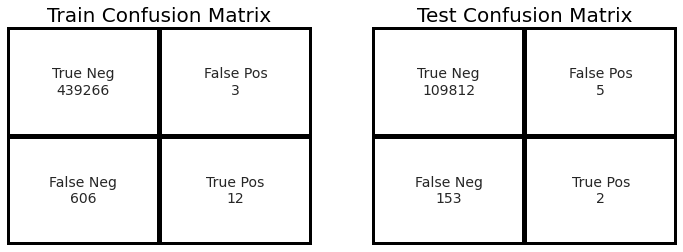

------------------------------------------------------------------------------------------------------


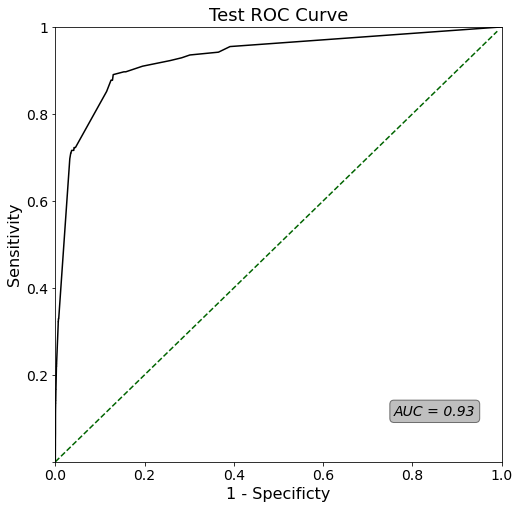

------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    109817
           1       0.29      0.01      0.02       155

    accuracy                           1.00    109972
   macro avg       0.64      0.51      0.51    109972
weighted avg       1.00      1.00      1.00    109972



In [110]:
fit_final(dtree_final)

## 5.10. Evaluación del modelo comparando $y$ vs $\hat{y}$
### Definiendo las predicción según el límite calculado por la matriz de costos 
Usando las métricas apropiadas en este caso para clasificación
Incluye modelo y predicciones finales junto con la matriz de costos y id de Clientes

In [111]:
y_train_pred_h = y_train_pred_proba[:, 1] > threshold
y_test_pred_h = y_test_pred_proba[:, 1] > threshold

In [112]:
y_train_pred_h.shape

(439887,)

In [113]:
y_test_pred_h.sum()

857

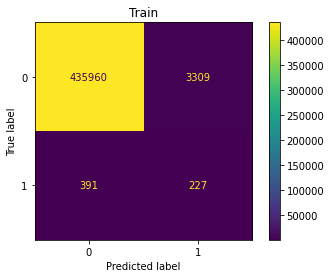

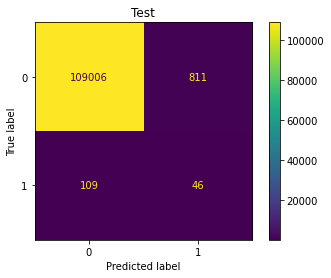

In [114]:
# HeatMap de Matriz de Confusión

cm_train = confusion_matrix(y_train, y_train_pred_h, labels=dtree_final.classes_)
cm_test = confusion_matrix(y_test, y_test_pred_h, labels=dtree_final.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                               display_labels=dtree_final.classes_)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                               display_labels=dtree_final.classes_)

disp_train.plot()
disp_train.ax_.set_title('Train')

disp_test.plot()
disp_test.ax_.set_title('Test')


plt.show()

In [115]:
# Tabla de métricas de Clasificación
target_names = ['class 0', 'class 1']
clf_report = classification_report(y_test, y_test_pred_h, target_names=target_names)
print(clf_report)

              precision    recall  f1-score   support

     class 0       1.00      0.99      1.00    109817
     class 1       0.05      0.30      0.09       155

    accuracy                           0.99    109972
   macro avg       0.53      0.64      0.54    109972
weighted avg       1.00      0.99      0.99    109972



### Armado del df con las probablilidades y recuperación de los Id de los clientes 

In [116]:
df_proba = pd.DataFrame()

In [117]:
df_proba['y_test'] = pd.Series(y_test)

In [118]:
df_proba['y_pred'] = y_test_pred_h

In [119]:
df_proba

,y_test,y_pred
43834,0,False
453438,0,False
385187,0,False
361367,0,False
424281,0,False
...,...,...
119561,0,False
360948,0,False
190871,0,False
29375,0,False


In [120]:
df_proba['y_proba'] = y_test_pred_proba[:,1]

In [121]:
df_proba.head()

,y_test,y_pred,y_proba
43834,0,False,0.000000
453438,0,False,0.000000
385187,0,False,0.000000
361367,0,False,0.000000
424281,0,False,0.000747


In [122]:
df_proba['costos'] = 0

In [123]:
df_proba['costos'] = np.where(((df_proba['y_test']== 1) & (df_proba['y_pred'] == 1)), 5000, df_proba['costos'])

In [124]:
df_proba['costos'] = np.where(((df_proba['y_test']== 0) & (df_proba['y_pred'] == 1)), -100, df_proba['costos'])

In [125]:
df_proba[(df_proba['y_test'] == 1) & (df_proba['y_test'] == 1)]

,y_test,y_pred,y_proba,costos
527146,1,False,0.016468,0
445718,1,False,0.004785,0
427370,1,True,0.416667,5000
537634,1,False,0.016468,0
219793,1,False,0.016468,0
...,...,...,...,...
483612,1,False,0.001704,0
256921,1,True,0.051873,5000
219033,1,False,0.016468,0
3228,1,False,0.016468,0


In [126]:
df_proba = df_proba.sort_values(by = 'y_proba')

In [127]:
df_proba['costo_cumsum'] = df_proba['costos'].cumsum()

In [128]:
df_proba.tail()

,y_test,y_pred,y_proba,costos,costo_cumsum
437975,0,True,1.0,-100,139100
548043,1,True,1.0,5000,144100
548893,0,True,1.0,-100,144000
510215,1,True,1.0,5000,149000
364561,0,True,1.0,-100,148900


In [129]:
df_proba['costo_cumsum'].describe()

count    109972.000000
mean        259.336922
std        4131.565594
min      -12800.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      149000.000000
Name: costo_cumsum, dtype: float64

### Recuperando los Id Clientes 
Haciendo la predicción de los Id de los clientes

In [130]:
# Creamos un df con el set de datos de predicción
df_pred = pd.DataFrame(data=X_test)

# Le sumamos la columna pred y target
df_pred['pred'] = y_test_pred_h
df_pred['target'] = y_test
df_pred.head() 

,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,mcaja_ahorro_dolares,mcuentas_saldo,mautoservicio,mplan_sueldo,mextraccion_autoservicio,...,trenta,tseguro,tdebitos_automaticos,tdescuento,ttransacciones,tcajas_total,tcajero_transaccion,ttarjeta_visa_master,pred,target
43834,1427.14,13830.95,945.93,-93.99,505.28,159.81,29472.42,2359.21,17974.71,13104.0,...,0,0,1,1,1,0,1,1,False,0
453438,760.95,12761.81,196.47,-95.87,578.33,88.93,232564.86,5347.66,219366.81,29250.0,...,0,0,1,1,1,0,1,1,False,0
385187,1031.42,9642.12,337.86,396.36,196.43,0.00,9137.94,1296.88,10797.93,11466.0,...,0,1,1,0,1,0,1,1,False,0
361367,1052.00,13657.09,346.51,596.09,6.89,0.00,-4094.66,0.00,0.00,468.0,...,0,1,1,1,1,0,1,1,False,0
424281,0.00,6964.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,1,1,1,0,0,0,1,False,0


In [131]:
id_clientes = list(df_pred['numero_de_cliente'][df_pred['pred']==1])
id_clientes.sort()
len(id_clientes)

857

### Analizamos la Importancia de las variables

In [132]:
feature_names = dtree_final.feature_names_in_

In [133]:
feature_names

array(['marketing_activo_ultimos90dias', 'Master_marca_atraso',
       'Visa_marca_atraso', 'marketing_coss_selling_6',
       'Master_cuenta_estado_11.0', 'Master_cuenta_estado_12.0',
       'Visa_cuenta_estado_11.0', 'Visa_cuenta_estado_12.0',
       'Visa_cuenta_estado_19.0', 'Visa_tadelantosefectivo', 'tdescuento',
       'ttransacciones', 'tcajero_transaccion'], dtype=object)

In [134]:
feature_imp = dtree_final.feature_importances_

In [135]:
feature_imp

array([0.30612464, 0.05170208, 0.07159979, 0.07110718, 0.07893525,
       0.03819648, 0.07751385, 0.03019858, 0.01494953, 0.08612196,
       0.04196115, 0.10052767, 0.03106185])

In [136]:
features = pd.DataFrame

In [137]:
features = pd.DataFrame([feature_names, feature_imp]).T
features.rename(columns={0: 'feature_names', 1: 'feature_imp'}, inplace=True)
features.sort_values(by = 'feature_imp', ascending = False)
features['feature_pct'] = (features['feature_imp'] / features['feature_imp'].sum()) * 100

Text(0.5, 1.0, 'Impacto de las Variables incluidas en el modelo')

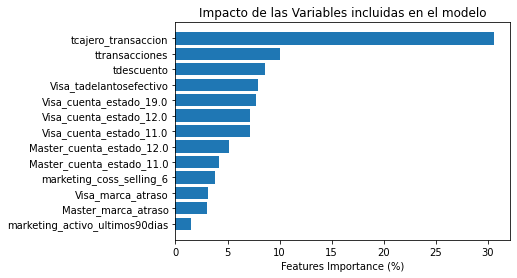

In [138]:
# Grafico de las variables analizadas y su importancia
plt.barh(features.feature_names, features.feature_pct.sort_values())
plt.xlabel("Features Importance (%)")
plt.title('Impacto de las Variables incluidas en el modelo')

# 6. Conclusiones

Se utilizó Árbol de decisión con mejoras en los hiperparámetros, ya que fue el modelo que mejor se aproximó al score pretendido. Para el score, decidimos usar recall como parámetro de medición, por la forma de la matriz de condición para el problema planteado, ya que consideramos que se adecuaba mejor a la condición. La suma determinada por el modelo y la matriz, arrojó un positivo de $149k.


Predicción del mes de Abril

In [139]:
#Dataset de 201404
X_04 = pd.read_csv('/content/drive/My Drive/DataScience/Banco/banco_to_model_201404.csv', index_col = 0)#, low_memory = False)

In [140]:
#NO tomamos en cuenta el Id_cliente (columna [0])
X_04_data = X_04.drop(["numero_de_cliente"], axis = 1)

In [141]:
#Escalado de X
  
X_04_data_std = scaler.transform(X_04_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [142]:
X_04_data_std = pd.DataFrame(X_04_data_std, columns = X_04_data.columns)

In [143]:
#Transformación de X
X_04_data_std_sel = feature_sel.transform(X_04_data_std)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [144]:
#Predicción de datos
y_04_pred = dtree_final.predict(X_04_data_std_sel)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [145]:
#X_04_data_std_sel["Predict"] = y_04_pred #Tira Error
X_04["Predict"] = y_04_pred

In [148]:
X_04.head()

,numero_de_cliente,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,mcaja_ahorro_dolares,mcuentas_saldo,ctarjeta_debito_transacciones,...,marketing_coss_selling_8,marketing_coss_selling_9,marketing_coss_selling_otros,Master_cuenta_estado_11.0,Master_cuenta_estado_12.0,Master_cuenta_estado_19.0,Visa_cuenta_estado_11.0,Visa_cuenta_estado_12.0,Visa_cuenta_estado_19.0,Predict
0,5609788,239,-83.11,8931.04,395.03,-482.88,74.20,0.00,800.80,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5609981,198,379.81,4411.55,144.07,172.59,28.90,0.00,286.27,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,5610023,93,491.06,6913.57,843.05,-513.40,212.55,0.00,2275.61,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5610089,239,498.52,0.00,578.10,-242.99,174.97,0.00,1372.90,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5610101,47,3333.87,57336.04,1075.12,72.65,1857.91,116.55,149834.76,12,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [150]:
#X_04.to_csv("Prediccion04.csv")
X_04.to_csv("/content/drive/My Drive/DataScience/Banco/Prediccion04.csv")